# Naive Bayes (the easy way)

We'll cheat by using sklearn.naive_bayes to train a spam classifier! Most of the code is just loading our training data into a pandas DataFrame that we can play with:

In [1]:
import os
import io
import numpy
import pandas as pd
from pandas import DataFrame


def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message


def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

# data = pd.concat([data, dataFrameFromDirectory("emails/spam", "spam")]);
# data = pd.concat([data, dataFrameFromDirectory("emails/ham", "ham")])

# For Pandas 1.3:
# data = data.append(dataFrameFromDirectory('emails/spam', 'spam'))
# data = data.append(dataFrameFromDirectory('emails/ham', 'ham'))

data = data.append(dataFrameFromDirectory('C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/spam', 'spam'))
data = data.append(dataFrameFromDirectory('C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/ham', 'ham'))

C:\Users\alero\AppData\Local\Temp\ipykernel_16084\185593513.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataFrameFromDirectory('C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/spam', 'spam'))
C:\Users\alero\AppData\Local\Temp\ipykernel_16084\185593513.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataFrameFromDirectory('C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/ham', 'ham'))


Let's have a look at that DataFrame:

In [2]:
data.head()

,message,class
C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/spam\00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/spam\00004.eac8de8d759b7e74154f142194282724,##############################################...,spam
C:/Users/alero/Documents/GitHub/Machine-Learning-Data-Science-and-Generative-AI-with-Python/MLCourse/emails/spam\00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,spam


Now we will use a CountVectorizer to split up each message into its list of words, and throw that into a MultinomialNB classifier. Call fit() and we've got a trained spam filter ready to go! It's just that easy.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB()

In [4]:
type(counts)

scipy.sparse._csr.csr_matrix

Let's try it out:

In [5]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

## Activity

Our data set is small, so our spam classifier isn't actually very good. Try running some different test emails through it and see if you get the results you expect.

If you really want to challenge yourself, try applying train/test to this spam classifier - see how well it can predict some subset of the ham and spam emails.

### Part 1 Running different test emails

In [6]:
email_1 = 'Hi Alejandro, Your AI-improved resume and premium Career.io access are waiting! Check out your new and improved resume in Career.io’s advanced builder, and activate your free 7-day premium access to take advantage of the 18 tools that will advance your career. Here are just a few ways to use premium Career.io access:Create an exceptional resume & cover letter with our AI-powered phrases & optimization and eye-catching templates using the Resume & Cover Letter builders.Discover job opportunities and manage your applications seamlessly with our Job Search & Job Search Tracker.Enhance your job search strategy with expert guidance and step-by-step guides in the Job Search Plan tool. Nail your interviews with the Interview Prep tool, offering tailored practice questions and AI feedback for optimal performance. Take advantage of this incredible opportunity to take your career to the next level!'
email_2 = 'Your Spring Hyundai Service. Our Service Departments Are Ready To Inspect Your Vehicle. Book your appointment today!'
email_3 = 'Heres your chance! Up to 90% OFF... Hurry up!'
examples = [email_1, email_2, email_3]

example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['ham', 'ham', 'ham'], dtype='<U4')

I was expecting at least email 2 and 3 to be spam so let do the second part of the activity to see how well Naive Bayes Clasifier perform in unseen data applying the training and test split from pandas.

### Part 2: Spliting in training and testing datasets

In [7]:
data.shape

(3000, 2)

#### Data preparation
One point to bring up is that the process of vectorization should be do it on all the dataset, so the universe of words from our problem could have a representation of each word.  

For example, if we split our data first in the training and the testing datasets, we will get a vectorization from the training data which is going to be different from the one that we could get from the testing, as there are going to be words from the training data that are not going to be necessary present in the testing data.

Having this in mind lets do the process again from scratch

In [8]:
# Creating the vectorizer from the universe of words wchich is all the dataset
vectoriazer = CountVectorizer(decode_error='ignore')
counts = vectorizer.fit_transform(data['message'].values)

Lets now import the training test split function to use it on our data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = counts
y = data[['class']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123, shuffle = True)

In [12]:
print(X_train.shape)
print(X_test.shape)

(2400, 62964)
(600, 62964)


In [13]:
print(y_train.shape)
print(y_test.shape)

(2400, 1)
(600, 1)


In [14]:
type(X_train)

scipy.sparse._csr.csr_matrix

#### Model fitting

Once we have our data split into training and testing datasets we can proceed to fit the NB clasifier model using the training data.

In [15]:
classifier = MultinomialNB()

classifier.fit(X_train, y_train['class'].values)

MultinomialNB()

#### Getting predictions

Once the model is fit we can proceed to get our predictions using the testing dataset, and then compare with the real values to measure the performance of the model.

In [16]:
y_predictions = classifier.predict(X_test)

In [17]:
y_predictions.shape

(600,)

#### Model evaluation
Now that we got our predictions for the test dataset using our trained NB classifier model we can measure the performance of the model using a confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix 

In [19]:
cm = confusion_matrix(y_test['class'].values, y_predictions)
cm

array([[508,   2],
       [ 22,  68]], dtype=int64)

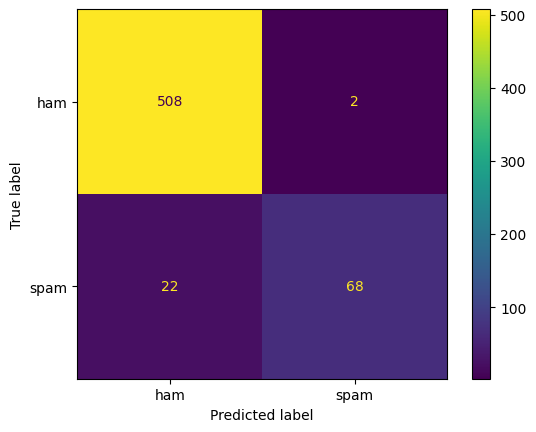

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
classes = ['ham', 'spam']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()


As we can see from the confusion matrix there are 2 email that are ham, which are classified as spam for our model, and on the other hand, there are 22 spam emails which are classified as ham for our model. 

In [26]:
cm.sum()

600

In [37]:
accuracy = (cm[0,0] + cm[1,1])/cm.sum()
precision = cm[0,0]/ (cm[0,0] + cm[1,0]) # TP / (TP + FP) 
recall = cm[0,0] / (cm[0,0] + cm[0,1])  # TP / (TP + FN)


print('Accuracy {:.3f}'.format(accuracy) ) 
print('Precision {:.3f}'.format(precision) ) # among all the ham prediction by the model, how many are real ham.
print('Recall {:.3f}'.format(recall)) # among all the positive ham, how many the model predicted well.

Accuracy 0.960
Precision 0.958
Recall 0.996


# Concepts applied in this notebook:

- **Multinomial Naive Bayes Classifier Model:** This is a specific instance of a Naive Bayes classifier which is used for multinomially distributed data, and it's particularly suitable for text classification problems. The principle behind Naive Bayes is based on Bayes' theorem, with the 'naive' assumption that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature. In text classification, this could mean classifying a document or email as belonging to one of several categories based on the text content. The "multinomial" aspect relates to the distribution of words in the document; it assumes that the features (words) follow a multinomial distribution rather than a Gaussian (continuous) distribution, which makes it suitable for discrete data such as word counts in text.


- **Vectorization:** In the context of machine learning and NLP, vectorization is the process of converting text into numerical data so that it can be used to train models. Since machine learning algorithms work with numerical data, this step is crucial for text analysis. There are several methods to vectorize text, including simple count methods that record the frequency of each word in a text, and more complex models like TF-IDF (Term Frequency-Inverse Document Frequency) that adjust frequencies based on the word’s rarity across documents, aiming to capture more about the word's importance.

    - **Count Vectorizer:** Specifically in the context of NLP, a count vectorizer is a type of vectorization technique that converts a collection of text documents into a matrix of token counts. This model will iterate through the documents and count the occurrence of each word (token). The output is a sparse matrix where each row represents a document and each column represents a token from across all documents, with the values being the count of the token in the document. This method is straightforward but effective for many text classification tasks, providing the raw frequencies of terms as features for the model.

- **Tokenizer:** A tokenizer is a tool used to split text into individual units called tokens, which can be words, characters, or subwords. This is a fundamental step in text preprocessing before further analysis or modeling can be performed. Tokenization helps in breaking down text into manageable pieces for algorithms to process and understand the structure of the text. Different tokenizers have different rules for identifying tokens, often considering punctuation, spaces, and sometimes grammatical structures.


- **Confusion Matrix:** A confusion matrix is a table often used to describe the performance of a classification model on a set of test data for which the true values are known. It's especially useful for assessing performance in binary and multiclass classification problems. The matrix compares the actual target values with those predicted by the model, providing insights into not only the overall accuracy but also how the model performs with respect to each class. It includes true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN), which can be used to calculate various performance metrics such as precision, recall, and F1 score. The confusion matrix helps in understanding not just the errors being made but also the types of errors, which is crucial for improving the model.

    
    
    
# Python insights:
* data['column_name'] --> returns a Pandas.Series
* data[['column_name]] --> returns a Pandas.DataFrame
     